In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# Load the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('C:/Users/Yukta/Desktop/desktop files/self_study/github/machine_learning_disease/Project2/Datasets/diabetes.csv')

# Print the first 5 rows of the dataset
print(diabetes_dataset.head())

# Get the number of rows and columns in this dataset
print(diabetes_dataset.shape)

# Get the statistical measures of the data
print(diabetes_dataset.describe())

# Get the distribution of the Outcome
print(diabetes_dataset['Outcome'].value_counts())

# Group by Outcome and calculate mean for each group
print(diabetes_dataset.groupby('Outcome').mean())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


<AxesSubplot: xlabel='Age', ylabel='Count'>

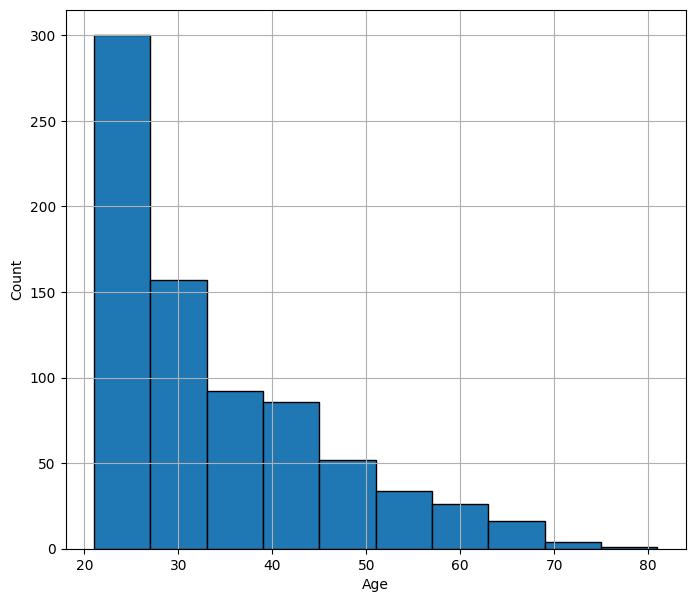

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
diabetes_dataset['Age'].hist(edgecolor="black")

In [5]:
print(diabetes_dataset['Age'].max())
print(diabetes_dataset['Age'].min())

81
21


C:\temp\ipykernel_11252\590990129.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_dataset.Pregnancies, bins=20, ax=ax[0,0], color="red")
C:\temp\ipykernel_11252\590990129.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_dataset.Glucose, bins=20, ax=ax[0,1], color="red")


<AxesSubplot: xlabel='Age', ylabel='Density'>

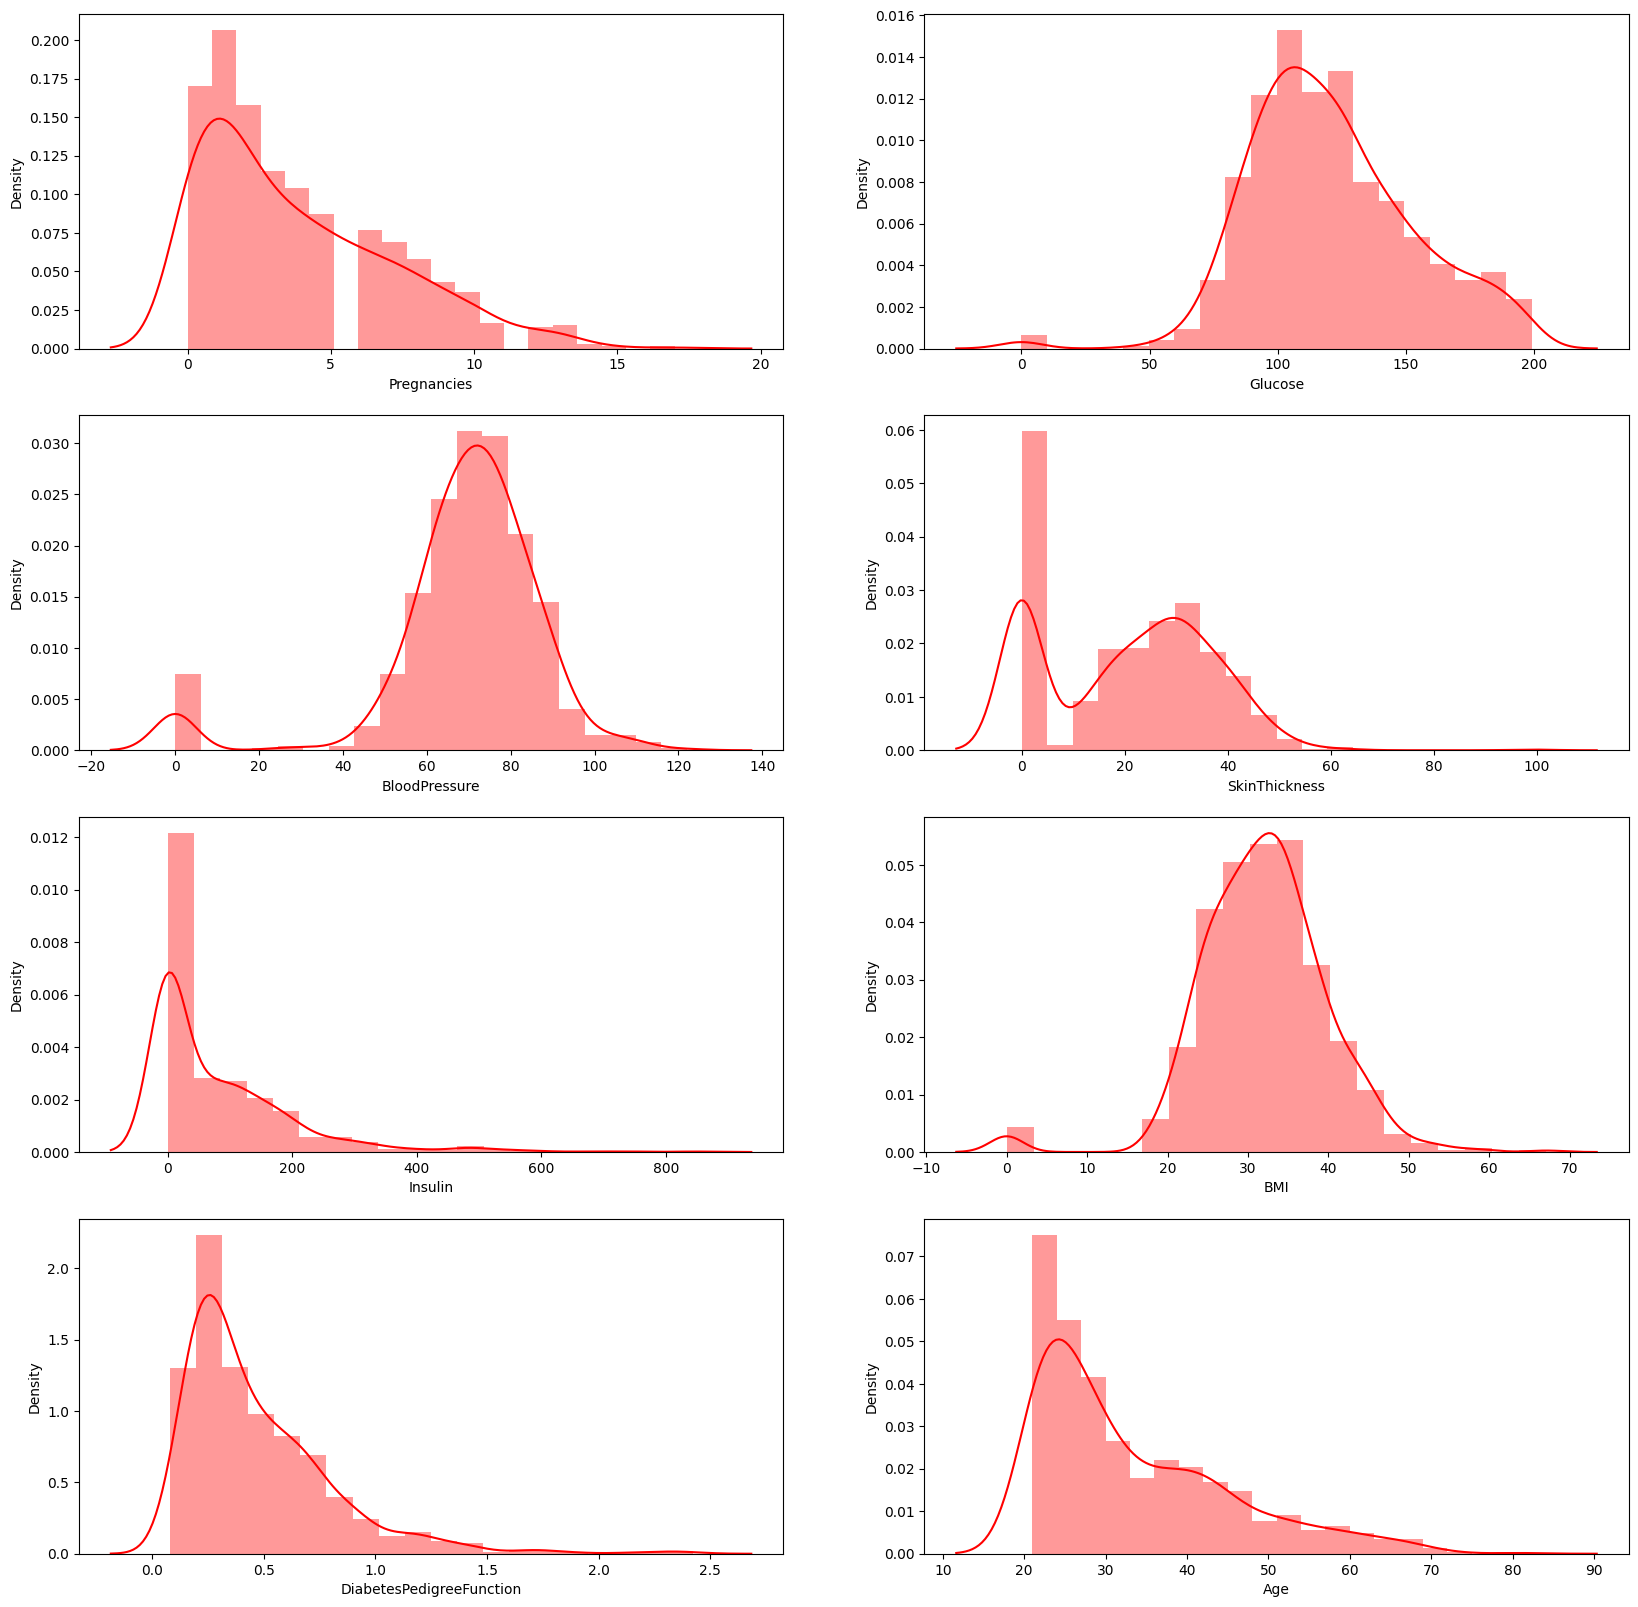

In [6]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(diabetes_dataset.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(diabetes_dataset.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(diabetes_dataset.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(diabetes_dataset.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(diabetes_dataset.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(diabetes_dataset.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(diabetes_dataset.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(diabetes_dataset.Age, bins=20, ax=ax[3,1], color="red")

In [10]:
print(diabetes_dataset.groupby("Outcome").agg({'Pregnancies':'mean'}))
print(diabetes_dataset.groupby("Outcome").agg({'Pregnancies':'max'}))
print(diabetes_dataset.groupby("Outcome").agg({'Glucose':'mean'}))
print(diabetes_dataset.groupby("Outcome").agg({'Glucose':'max'}))

         Pregnancies
Outcome             
0           3.298000
1           4.865672
         Pregnancies
Outcome             
0                 13
1                 17
            Glucose
Outcome            
0        109.980000
1        141.257463
         Glucose
Outcome         
0            197
1            199


In [11]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


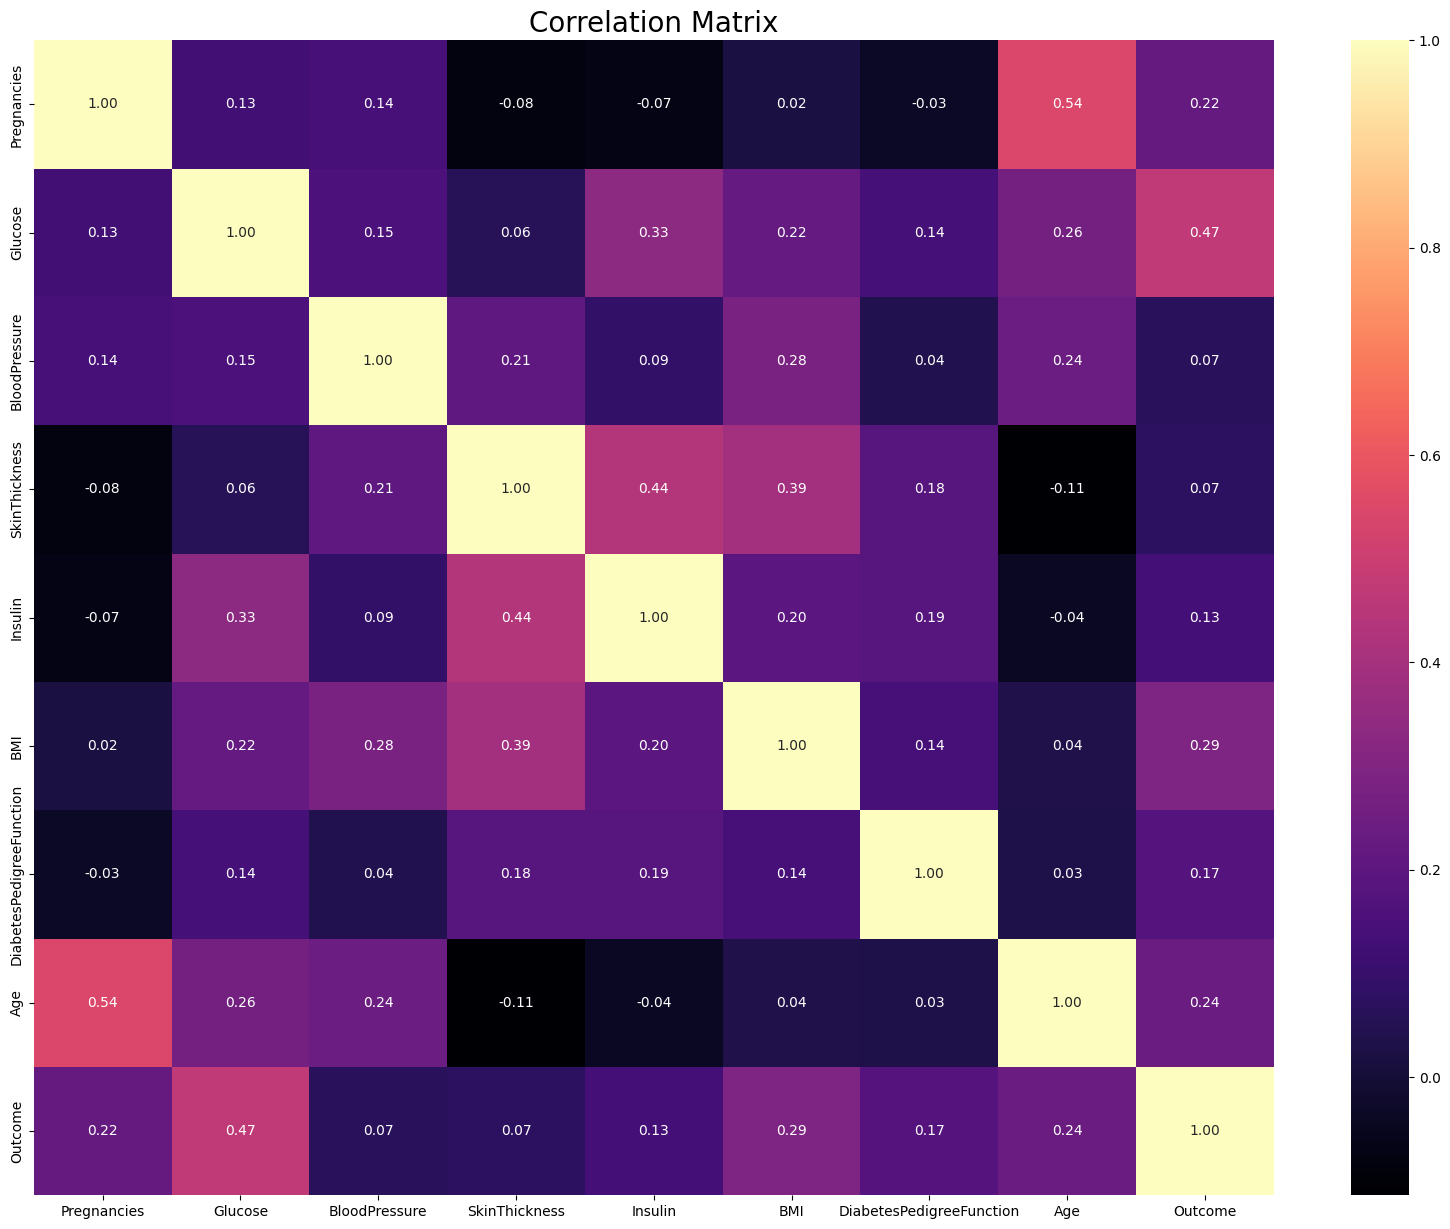

In [12]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(diabetes_dataset.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [13]:
def median_target(var):
    temp = diabetes_dataset[diabetes_dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [16]:
columns = diabetes_dataset.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0 ) & (diabetes_dataset[i].isnull()), i] = median_target(i)[i][0]
    diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1 ) & (diabetes_dataset[i].isnull()), i] = median_target(i)[i][1]
###check this

In [17]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot: xlabel='Insulin'>

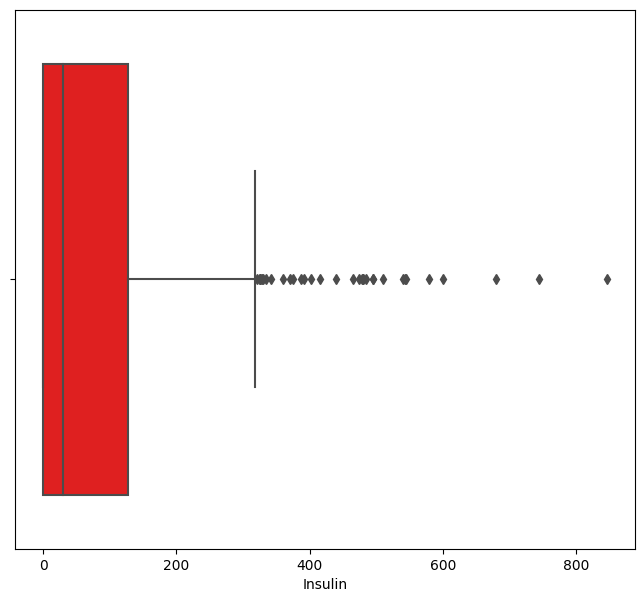

In [18]:
plt.figure(figsize=(8,7))
sns.boxplot(x= diabetes_dataset["Insulin"], color="red")

In [19]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [20]:
# Separate the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# Define the DNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2, batch_size=32)


Epoch 1/100
16/16 [==============================] - 10s 139ms/step - loss: 0.7542 - accuracy: 0.3809 - val_loss: 0.7001 - val_accuracy: 0.4797
Epoch 2/100
16/16 [==============================] - 1s 33ms/step - loss: 0.6877 - accuracy: 0.5662 - val_loss: 0.6627 - val_accuracy: 0.6098
Epoch 3/100
16/16 [==============================] - 1s 40ms/step - loss: 0.6375 - accuracy: 0.6864 - val_loss: 0.6307 - val_accuracy: 0.6748
Epoch 4/100
16/16 [==============================] - 0s 32ms/step - loss: 0.5946 - accuracy: 0.7291 - val_loss: 0.6049 - val_accuracy: 0.6585
Epoch 5/100
16/16 [==============================] - 1s 43ms/step - loss: 0.5602 - accuracy: 0.7434 - val_loss: 0.5840 - val_accuracy: 0.6911
Epoch 6/100
16/16 [==============================] - 1s 51ms/step - loss: 0.5325 - accuracy: 0.7495 - val_loss: 0.5656 - val_accuracy: 0.6992
Epoch 7/100
16/16 [==============================] - 1s 40ms/step - loss: 0.5087 - accuracy: 0.7637 - val_loss: 0.5503 - val_accuracy: 0.6992
Epoc

In [23]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_accuracy)

# Predict on the test data
Y_pred = (model.predict(X_test) > 0.5).astype("int32")
print('Accuracy score on test data:', accuracy_score(Y_test, Y_pred))

5/5 [==============================] - 0s 21ms/step - loss: 0.5408 - accuracy: 0.7403
Test accuracy: 0.7402597665786743
5/5 [==============================] - 0s 10ms/step
Accuracy score on test data: 0.7402597402597403


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
y_pred = xgb.predict(X_test)
print(accuracy_score(Y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(Y_test, xgb.predict(X_test))
print(accuracy_score(Y_test, xgb.predict(X_test)))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9723127035830619
0.7402597402597403
[[88 12]
 [28 26]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(Y_train, knn.predict(X_train)))
knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(accuracy_score(Y_test, knn.predict(X_test)))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.8273615635179153
0.7142857142857143
[[87 13]
 [31 23]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(Y_train, DT.predict(X_train)))
dt_acc = accuracy_score(Y_test, DT.predict(X_test))
print(accuracy_score(Y_test, DT.predict(X_test)))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

1.0
0.7012987012987013
[[84 16]
 [30 24]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       100
           1       0.60      0.44      0.51        54

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.69      0.70      0.69       154



In [31]:
models = pd.DataFrame({
    'Model': ['KNN',  'Xgbclassifier',  'Decision Tree','DNN'],
    'Score': [knn_acc, xgb_acc, dt_acc, test_accuracy]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,DNN,0.740260
1,Xgbclassifier,0.740260
0,KNN,0.714286
2,Decision Tree,0.701299


In [32]:
def predict_diabetes(input_data):
    # Convert the input data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)
    # Reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    # Standardize the input data
    input_data_reshaped = scaler.transform(input_data_reshaped)
    # Make prediction
    prediction = (model.predict(input_data_reshaped) > 0.5).astype("int32")
    if prediction[0][0] == 0:
        print('The person is not diabetic')
    else:
        print('The person is diabetic')

# Test the predictive system
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
predict_diabetes(input_data)


c:\Users\Yukta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 196ms/step
The person is diabetic


In [34]:
import pickle
filename = 'diabetes_model_DNN.sav'
pickle.dump(model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('diabetes_model_DNN.sav', 'rb'))

In [ ]:
# Save the model
model.save('diabetes_dnn_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('diabetes_dnn_model.h5')

# Test the loaded model
predict_diabetes(input_data)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
The person is diabetic
